In [2]:
from orphics.stats import FisherMatrix
from orphics.stats import corner_plot

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
### LCDM parameters
h=0.6774 # See README and the accompanying paper regarding the value of h. 
Om = 0.3089
Omh2=(h**2)*Om
Obh2 = 0.02203
Och2 = Omh2-Obh2
ns=0.9667
s8=0.8159
### Hu-Sawicki model parameters
fr0=1e-5
n=1

In [29]:
params = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})', r'n', r'b_1']
paramssmall = [r'\Omega_m h^2', r'\sigma_{8}', r'n_s', r'\log(f_{R_0})', r'n']

In [38]:
Fishertest = np.loadtxt('./Covariance_data/Fisherz.txt')
print (np.linalg.inv(Fishertest))

[[ 2.68864637e-05 -1.01387594e-05 -2.86307925e-04  1.37996583e-03
   4.89064742e-04 -4.74911013e-05]
 [-1.01387594e-05  4.57570525e-03  5.40389124e-03 -8.80287467e-03
  -1.20988811e-03  1.37067405e-04]
 [-2.86307925e-04  5.40389124e-03  1.07295340e-02 -2.99107106e-02
  -8.89535906e-03  6.55196972e-04]
 [ 1.37996583e-03 -8.80287467e-03 -2.99107106e-02  1.12446257e-01
   4.07794425e-02 -2.71347279e-03]
 [ 4.89064742e-04 -1.20988811e-03 -8.89535906e-03  4.07794425e-02
   1.87594235e-02 -8.53636164e-04]
 [-4.74911013e-05  1.37067405e-04  6.55196972e-04 -2.71347279e-03
  -8.53636164e-04  9.06559188e-05]]


In [44]:
Fishertot = FisherMatrix(np.absolute(Fishertest),params)
fishertry = [Fishertot]

/Users/gev866/anaconda/envs/py37/lib/python3.7/site-packages/orphics/stats.py:244: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [45]:
labels=[r'Y10 sample']
print (Fishertot)

               \Omega_m h^2    \sigma_{8}           n_s  \log(f_{R_0})  \
\Omega_m h^2   1.845110e+06  40979.141098  49882.530049   32269.360233   
\sigma_{8}     4.097914e+04   2972.430922   3610.969834    1358.523568   
n_s            4.988253e+04   3610.969834   5390.794446    2323.965398   
\log(f_{R_0})  3.226936e+04   1358.523568   2323.965398    1318.783177   
n              4.005160e+04   1149.256779   2098.032321    1398.163364   
b_1            1.256761e+06  29705.076598  42434.636394   28470.519595   

                          n           b_1  
\Omega_m h^2   40051.595718  1.256761e+06  
\sigma_{8}      1149.256779  2.970508e+04  
n_s             2098.032321  4.243464e+04  
\log(f_{R_0})   1398.163364  2.847052e+04  
n               1693.604067  3.345785e+04  
b_1            33457.850377  9.447445e+05  


In [46]:
fid_dict = {r'\Omega_m h^2' : Omh2, r'\sigma_{8}' : s8, r'n_s' : ns, r'\log(f_{R_0})': -5, r'n' : 1, r'b_1' : 0.95}

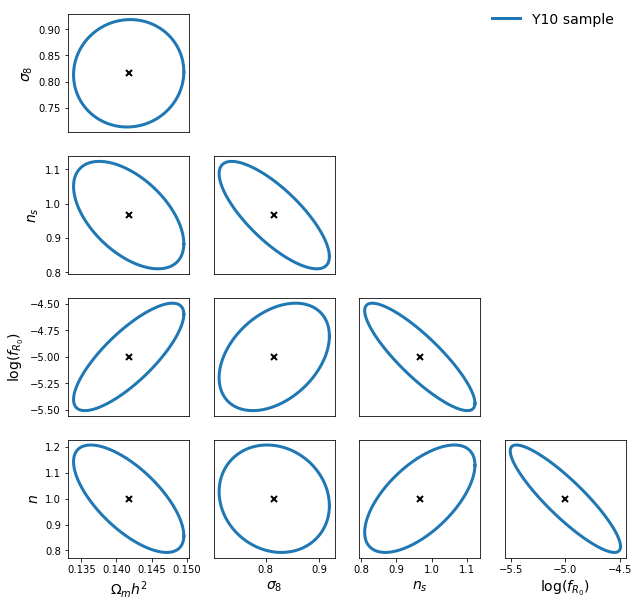

In [42]:
corner_plot(fishertry, labels, fid_dict, paramssmall, confidence_level=0.683)
#plt.savefig('./FisherTest.png')
plt.show()